<a href="https://colab.research.google.com/github/AhsanAbir001/ML-Lab-EWU/blob/main/Lab%202%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1: SVM Classification for MNIST Handwritten Digits**

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

digits = load_digits()
X = digits.data
y = digits.target

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale pixel values to range [0, 1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Linear SVM
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# RBF SVM
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Polynomial SVM
svm_poly = svm.SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

Linear Kernel
Accuracy: 0.975


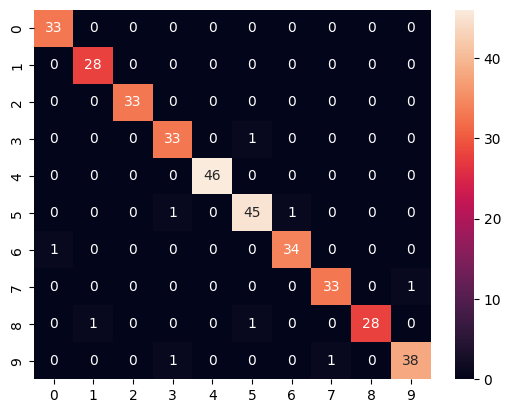

RBF Kernel
Accuracy: 0.9805555555555555


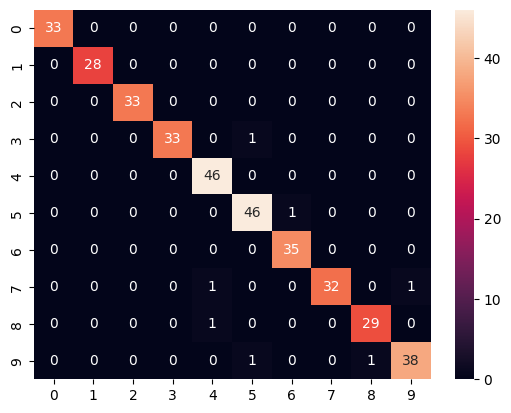

Polynomial Kernel
Accuracy: 0.9638888888888889


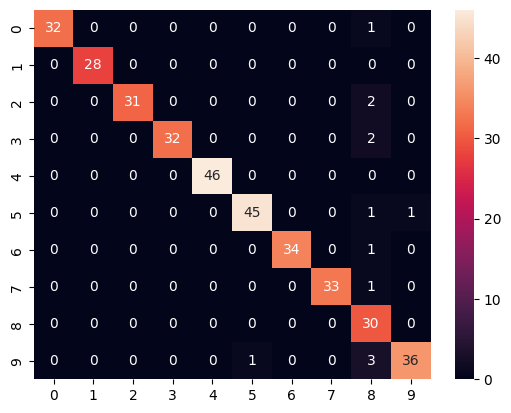

In [9]:
# Predict and evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.show()

# Evaluate Linear Kernel
print("Linear Kernel")
evaluate_model(svm_linear, X_test, y_test)

# Evaluate RBF Kernel
print("RBF Kernel")
evaluate_model(svm_rbf, X_test, y_test)

# Evaluate Polynomial Kernel
print("Polynomial Kernel")
evaluate_model(svm_poly, X_test, y_test)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ...............................C=0.001, gamma=scale; total time=   0.2s
[CV] END ...............................C=0.001, gamma=scale; total time=   0.2s
[CV] END ...............................C=0.001, gamma=scale; total time=   0.2s
[CV] END ...............................C=0.001, gamma=scale; total time=   0.2s
[CV] END ...............................C=0.001, gamma=scale; total time=   0.2s
[CV] END ................................C=0.001, gamma=auto; total time=   0.2s
[CV] END ................................C=0.001, gamma=auto; total time=   0.2s
[CV] END ................................C=0.001, gamma=auto; total time=   0.2s
[CV] END ................................C=0.001, gamma=auto; total time=   0.2s
[CV] END ................................C=0.001, gamma=auto; total time=   0.2s
[CV] END ................................C=0.01, gamma=scale; total time=   0.2s
[CV] END ................................C=0.01,

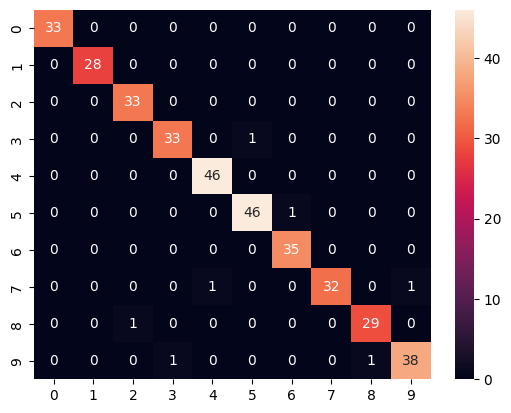

In [10]:
#optinal
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RBF kernel
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': ['scale', 'auto']}

# Grid search for RBF kernel
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters:", grid.best_params_)
evaluate_model(grid.best_estimator_, X_test, y_test)

**Part 2: SVM Regression for Boston Housing Prices**

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV


california = fetch_california_housing()
X, y = california.data, california.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:

svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_scaled, y_train)


svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_scaled, y_train)

SVR()

In [4]:
y_pred_linear = svr_linear.predict(X_test_scaled)
y_pred_rbf = svr_rbf.predict(X_test_scaled)


mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


mse_rbf = mean_squared_error(y_test, y_pred_rbf)
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)


print(f"Linear Kernel: MSE={mse_linear:.4f}, MAE={mae_linear:.4f}, R²={r2_linear:.4f}\n")
print(f"RBF Kernel: MSE={mse_rbf:.4f}, MAE={mae_rbf:.4f}, R²={r2_rbf:.4f}")

Linear Kernel: MSE=0.5793, MAE=0.5120, R²=0.5579

RBF Kernel: MSE=0.3570, MAE=0.3986, R²=0.7276


In [5]:
#Optiona


param_grid ={
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-3, 1e-4, 'scale', 'auto']}


grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


best_model = grid_search.best_estimator_


y_pred_best = best_model.predict(X_test_scaled)

mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Parameters:", grid_search.best_params_)
print(f"Best Model: MSE={mse_best}, MAE={mae_best}, R²={r2_best}")

Best Parameters: {'C': 100, 'gamma': 'auto'}
Best Model: MSE=0.3201215378324207, MAE=0.3717021980590209, R²=0.7557086809171946
